# Project 2
## Archie Tan
### 4/13/2023
#### Meets the requirements 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1MkHSbPyKTCK_uVP269Uf_IM8ReGvpllG')
test_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1XoQ96X4jXejwSd6HAs4QoJwT2vBD8xq2')

print(train_df.shape, test_df.shape)

(1500, 14) (500, 13)


In [ ]:
train_df

### Drop Columns and Rows

In [3]:
train = train_df.drop('ID', axis=1)

### Get job title from Name column

In [4]:
train = train.dropna(subset=['Name'])
def name(s):
  return s.split(' - ')[0]

def job(s):
  return s.split(' - ')[1]


train['Job'] = train['Name'].apply(job)
train['Name'] = train['Name'].apply(name)

In [5]:
train = train.drop('Name', axis=1)

### Get the Age from Birthday

In [6]:
def year(s):
  return int(s.split("-")[0])

train['Age'] = 2023 - train['Birthday'].apply(year)
train = train.drop('Birthday', axis=1)

In [7]:
def count(s):
  s = s.split(',')
  if s == "None":
    return 0
  else:
    return len(s)
  

train['Pets'] = train['Pets'].replace(np.nan, 'None')
train['Total_pets'] = train['Pets'].apply(count)
train = train.drop("Pets", axis=1)

In [8]:
train.head(10)

,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Beverage,Job,Age,Total_pets
0,he,176.35,6861,2181,81.3,7,40.81,2,High,Cider,software engineer,52,1
1,they,194.64,8161,2272,?,5,23.48,2,High,Tea,teacher,25,2
2,he,195.02,221,2029,21.92,14,44.74,1,None,Cider,scientist,67,2
3,she,153.16,221,2592,153.92,2,24.76,None,None,Coffee,physician,19,2
4,she,151.59,7770,1069,?,10,43.95,2,Low,Coffee,physician,87,1
5,he,157.80,221,1849,55.46,7,59.64,2,None,Cider,software engineer,97,2
6,they,143.07,221,1511,43.22,14,56.47,3,None,Cider,software engineer,28,1
7,they,166.60,849,2539,134.17,9,26.91,2,None,Tea,trucker,84,5
8,she,164.17,4532,1728,103.38,7,1.14,2,High,Coffee,assistant manager,29,1
9,she,146.64,6861,2160,77.87,11,26.98,3,Low,Tea,physician,32,2


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pronoun     1497 non-null   object 
 1   Weight      1497 non-null   float64
 2   ZipCode     1497 non-null   int64  
 3   SqFt        1497 non-null   int64  
 4   Water       1497 non-null   object 
 5   Shoes       1497 non-null   int64  
 6   Commute     1491 non-null   float64
 7   NumKids     1497 non-null   object 
 8   Exercise    1497 non-null   object 
 9   Beverage    1497 non-null   object 
 10  Job         1497 non-null   object 
 11  Age         1497 non-null   int64  
 12  Total_pets  1497 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 163.7+ KB


### Fill out the invaild data, and change the data type

In [10]:
train['Water'] = train['Water'].replace('?', 0)
train['Water'] = pd.to_numeric(train['Water'])
train['Water'] = train['Water'].replace(0, train['Water'].mean())
train['Water'].loc[train['Water'] < 0] = 0

<ipython-input-10-e24abf91bc87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Water'].loc[train['Water'] < 0] = 0


In [11]:
train['NumKids'] = train['NumKids'].replace('None', 0)
train['NumKids'] = pd.to_numeric(train['NumKids'])

### Map the Exercise column to numbers

In [12]:
train['Exercise'].unique()

array(['High', 'None', 'Low', 'Medium'], dtype=object)

<BarContainer object of 4 artists>

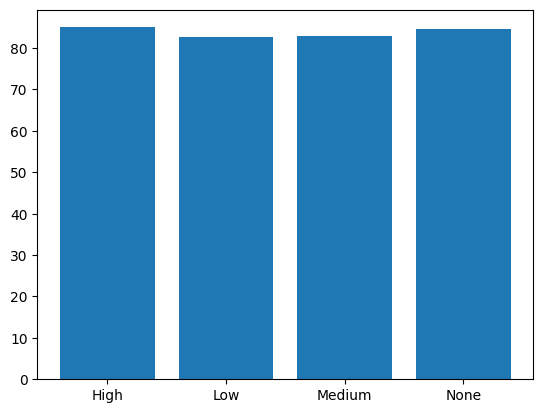

In [13]:
tmp = train.groupby('Exercise')['Water'].mean().reset_index()

fig, ax = plt.subplots()

ax.bar(x=tmp['Exercise'], height=tmp['Water'])

The amount of water one's drink doesn't really depends on how many exercise one did

<BarContainer object of 4 artists>

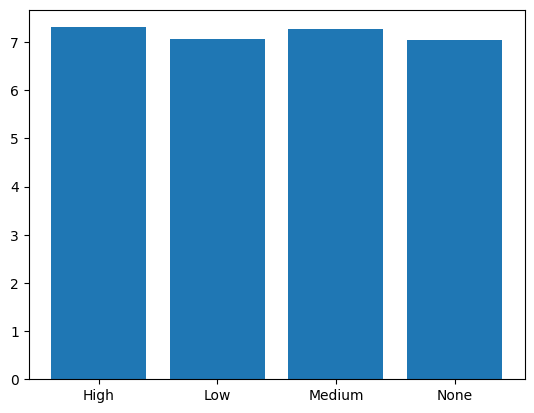

In [14]:
tmp = train.groupby('Exercise')['Shoes'].mean().reset_index()

fig, ax = plt.subplots()

ax.bar(x=tmp['Exercise'], height=tmp['Shoes'])

The numbers of pairs of shoes doesn't depends on how many excercise one's did

<BarContainer object of 4 artists>

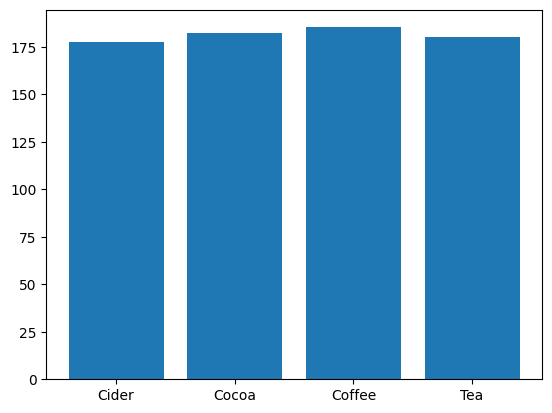

In [15]:
tmp = train.groupby('Beverage')['Weight'].mean().reset_index()

fig, ax = plt.subplots()

ax.bar(x=tmp['Beverage'], height=tmp['Weight'])

One's beverage perference dosen't affect one's weight much

In [16]:
train['Exercise'] = train['Exercise'].map({'High':3, 'None':0, 'Low':1, 'Medium':2})
train.head(5)

,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Beverage,Job,Age,Total_pets
0,he,176.35,6861,2181,81.300000,7,40.81,2,3,Cider,software engineer,52,1
1,they,194.64,8161,2272,83.309686,5,23.48,2,3,Tea,teacher,25,2
2,he,195.02,221,2029,21.920000,14,44.74,1,0,Cider,scientist,67,2
3,she,153.16,221,2592,153.920000,2,24.76,0,0,Coffee,physician,19,2
4,she,151.59,7770,1069,83.309686,10,43.95,2,1,Coffee,physician,87,1


### Heatmap

<ipython-input-17-69fb9efba5cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = train.corr()


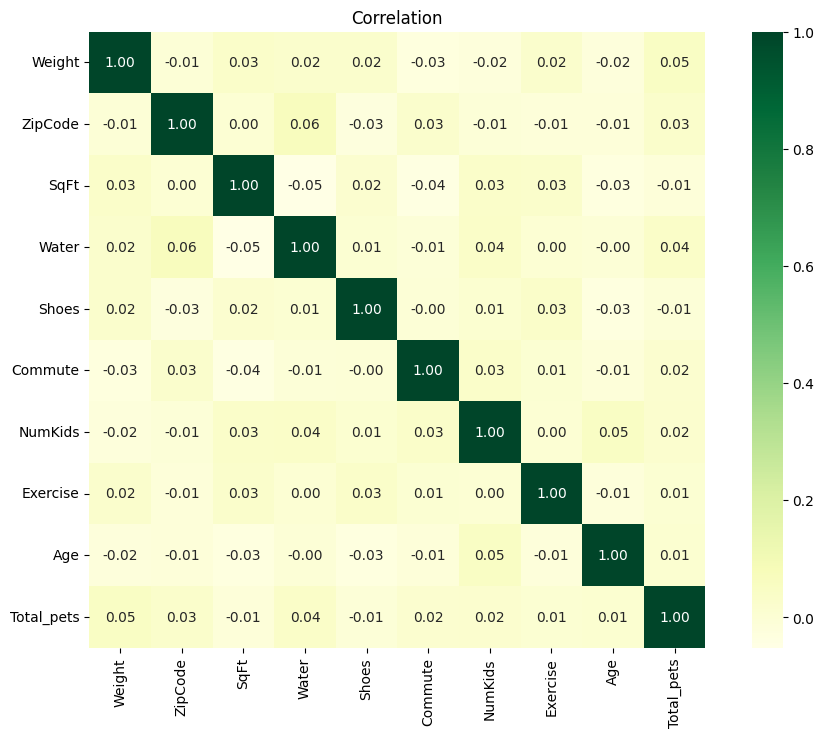

In [17]:
corr_map = train.corr()

fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(corr_map,square=True, annot=True, fmt='.2f', cmap="YlGn", cbar=True, ax=ax)
#sns.color_palette("light:b", as_cmap=True)
plt.title('Correlation');

In [18]:
train.describe()

,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,Total_pets
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1491.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,181.518938,3796.027388,2026.885772,83.899818,7.149633,26.126117,2.249165,1.306613,55.432198,2.739479
std,43.999459,3122.398213,612.722158,38.982943,3.809333,18.223098,1.327935,1.176947,23.719018,1.983285
min,130.140000,221.000000,-1000.000000,0.000000,0.000000,0.140000,0.000000,0.000000,18.000000,1.000000
25%,155.410000,221.000000,1717.000000,57.040000,4.000000,11.810000,1.000000,0.000000,33.000000,1.000000
50%,173.080000,3977.000000,2013.000000,83.420000,7.000000,23.430000,2.000000,1.000000,54.000000,2.000000
75%,193.700000,6861.000000,2265.000000,111.190000,10.000000,37.345000,3.000000,2.000000,76.000000,5.000000
max,379.940000,8161.000000,6494.000000,215.790000,22.000000,110.720000,6.000000,3.000000,98.000000,6.000000


### Identify and handle the outliers

In [19]:
train['SqFt'].sort_values()[:10]

1362   -1000
19     -1000
870    -1000
1303   -1000
1166   -1000
670    -1000
1185   -1000
1232   -1000
1407   -1000
140    -1000
Name: SqFt, dtype: int64

In [20]:
train['SqFt'] = train['SqFt'].replace(train['SqFt'].min(), 218)

In [21]:
train['Shoes'] = train['Shoes'].replace(0, 1)

In [22]:
train.sort_values(by='Commute')[:10]
train['Commute'] = train['Commute'].replace(np.nan, train['Commute'].mean())

In [23]:
train.head()

,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Beverage,Job,Age,Total_pets
0,he,176.35,6861,2181,81.300000,7,40.81,2,3,Cider,software engineer,52,1
1,they,194.64,8161,2272,83.309686,5,23.48,2,3,Tea,teacher,25,2
2,he,195.02,221,2029,21.920000,14,44.74,1,0,Cider,scientist,67,2
3,she,153.16,221,2592,153.920000,2,24.76,0,0,Coffee,physician,19,2
4,she,151.59,7770,1069,83.309686,10,43.95,2,1,Coffee,physician,87,1


In [24]:
train[train.duplicated]

,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Beverage,Job,Age,Total_pets


### Same Conversion on test data

In [25]:
test = test_df
test = test.dropna(subset=['Name'])
def name(s):
  return s.split(' - ')[0]

def job(s):
  return s.split(' - ')[1]
test['Job'] = test['Name'].apply(job)
test['Name'] = test['Name'].apply(name)
test = test.drop('Name', axis=1)

def year(s):
  return int(s.split("-")[0])
test['Age'] = 2023 - test['Birthday'].apply(year)
test = test.drop('Birthday', axis=1)

def count(s):
  s = s.split(',')
  if s == "None":
    return 0
  else:
    return len(s)
test['Pets'] = test['Pets'].replace(np.nan, 'None')
test['Total_pets'] = test['Pets'].apply(count)
test = test.drop("Pets", axis=1)

test['Water'] = test['Water'].replace('?', 0)
test['Water'] = pd.to_numeric(test['Water'])
test['Water'] = test['Water'].replace(0, test['Water'].mean())
test['Water'].loc[test['Water'] < 0] = 0

test['NumKids'] = test['NumKids'].replace('None', 0)
test['NumKids'] = pd.to_numeric(test['NumKids'])

test['Exercise'] = test['Exercise'].map({'High':3, 'None':0, 'Low':1, 'Medium':2})

test['SqFt'] = test['SqFt'].replace(test['SqFt'].min(), 218)

test['Shoes'] = test['Shoes'].replace(0, 1)

test['Commute'] = test['Commute'].replace(np.nan, test['Commute'].mean())

test.head(5)

<ipython-input-25-982bac0a4af8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Water'].loc[test['Water'] < 0] = 0


,ID,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Job,Age,Total_pets
0,101501,she,152.20,221,1862,117.52,1,8.22,2,0,sales associate,50,6
1,101502,he,154.95,221,1832,48.01,8,18.32,3,3,teacher,78,3
2,101503,they,181.33,221,1186,108.81,8,18.91,1,0,physician,20,2
3,101504,they,139.80,221,2100,71.49,4,32.95,3,0,sales associate,70,1
4,101505,she,139.87,221,2197,117.24,5,35.78,2,1,sales associate,90,1


### Clustering

In [26]:
train.head()

,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Beverage,Job,Age,Total_pets
0,he,176.35,6861,2181,81.300000,7,40.81,2,3,Cider,software engineer,52,1
1,they,194.64,8161,2272,83.309686,5,23.48,2,3,Tea,teacher,25,2
2,he,195.02,221,2029,21.920000,14,44.74,1,0,Cider,scientist,67,2
3,she,153.16,221,2592,153.920000,2,24.76,0,0,Coffee,physician,19,2
4,she,151.59,7770,1069,83.309686,10,43.95,2,1,Coffee,physician,87,1


In [27]:
cluster_df = train
cluster_df['Weight'] = (cluster_df['Weight']-cluster_df['Weight'].min()) / (cluster_df['Weight'].max()-cluster_df['Weight'].min())
cluster_df['SqFt'] = (cluster_df['SqFt']-cluster_df['SqFt'].min()) / (cluster_df['SqFt'].max()-cluster_df['SqFt'].min())
cluster_df['Water'] = (cluster_df['Water']-cluster_df['Water'].min()) / (cluster_df['Water'].max()-cluster_df['Water'].min())
cluster_df['Commute'] = (cluster_df['Commute']-cluster_df['Commute'].min()) / (cluster_df['Commute'].max()-cluster_df['Commute'].min())
cluster_df['NumKids'] = (cluster_df['NumKids']-cluster_df['NumKids'].min()) / (cluster_df['NumKids'].max()-cluster_df['NumKids'].min())
cluster_df['Shoes'] = (cluster_df['Shoes']-cluster_df['Shoes'].min()) / (cluster_df['Shoes'].max()-cluster_df['Shoes'].min())
cluster_df['Age'] = (cluster_df['Age']-cluster_df['Age'].min()) / (cluster_df['Age'].max()-cluster_df['Age'].min())
cluster_df['Total_pets'] = (cluster_df['Total_pets']-cluster_df['Total_pets'].min()) / (cluster_df['Total_pets'].max()-cluster_df['Total_pets'].min())
cluster_df['Exercise'] = (cluster_df['Exercise']-cluster_df['Exercise'].min()) / (cluster_df['Exercise'].max()-cluster_df['Exercise'].min())

ytrain = cluster_df['Beverage']
Xtrain = cluster_df.drop('Beverage', axis=1)

cluster_df = cluster_df.drop('Beverage', axis=1)
Xtrain = pd.get_dummies(Xtrain)
Xtrain.head(5)

,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,Total_pets,...,Job_general manager,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president
0,0.184988,6861,0.312779,0.376755,0.285714,0.367788,0.333333,1.000000,0.4250,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.258207,8161,0.327279,0.386068,0.190476,0.211069,0.333333,1.000000,0.0875,0.2,...,0,0,0,0,0,0,0,1,0,0
2,0.259728,221,0.288560,0.101580,0.619048,0.403328,0.166667,0.000000,0.6125,0.2,...,0,0,0,0,1,0,0,0,0,0
3,0.092154,221,0.378266,0.713286,0.047619,0.222644,0.000000,0.000000,0.0125,0.2,...,0,1,0,0,0,0,0,0,0,0
4,0.085869,7770,0.135596,0.386068,0.428571,0.396184,0.333333,0.333333,0.8625,0.0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
cluster_t = test
cluster_t['Weight'] = (cluster_t['Weight']-cluster_t['Weight'].min()) / (cluster_t['Weight'].max()-cluster_t['Weight'].min())
cluster_t['SqFt'] = (cluster_t['SqFt']-cluster_t['SqFt'].min()) / (cluster_t['SqFt'].max()-cluster_t['SqFt'].min())
cluster_t['Water'] = (cluster_t['Water']-cluster_t['Water'].min()) / (cluster_t['Water'].max()-cluster_t['Water'].min())
cluster_t['Commute'] = (cluster_t['Commute']-cluster_t['Commute'].min()) / (cluster_t['Commute'].max()-cluster_t['Commute'].min())
cluster_t['NumKids'] = (cluster_t['NumKids']-cluster_t['NumKids'].min()) / (cluster_t['NumKids'].max()-cluster_t['NumKids'].min())
cluster_t['Shoes'] = (cluster_t['Shoes']-cluster_t['Shoes'].min()) / (cluster_t['Shoes'].max()-cluster_t['Shoes'].min())
cluster_t['Age'] = (cluster_t['Age']-cluster_t['Age'].min()) / (cluster_t['Age'].max()-cluster_t['Age'].min())
cluster_t['Total_pets'] = (cluster_t['Total_pets']-cluster_t['Total_pets'].min()) / (cluster_t['Total_pets'].max()-cluster_t['Total_pets'].min())
cluster_t['Exercise'] = (cluster_t['Exercise']-cluster_t['Exercise'].min()) / (cluster_t['Exercise'].max()-cluster_t['Exercise'].min())

Xtest = cluster_t
Xtest = pd.get_dummies(Xtest)
Xtest.head(5)

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_general manager,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president
0,101501,0.088231,221,0.294729,0.548416,0.000000,0.078791,0.333333,0.000000,0.405063,...,0,0,0,1,0,0,0,0,0,0
1,101502,0.099239,221,0.289351,0.224042,0.411765,0.175720,0.500000,1.000000,0.759494,...,0,0,0,0,0,0,0,1,0,0
2,101503,0.204844,221,0.173539,0.507770,0.411765,0.181382,0.166667,0.000000,0.025316,...,0,1,0,0,0,0,0,0,0,0
3,101504,0.038591,221,0.337397,0.333613,0.176471,0.316123,0.500000,0.000000,0.658228,...,0,0,0,1,0,0,0,0,0,0
4,101505,0.038871,221,0.354787,0.547109,0.235294,0.343282,0.333333,0.333333,0.911392,...,0,0,0,1,0,0,0,0,0,0


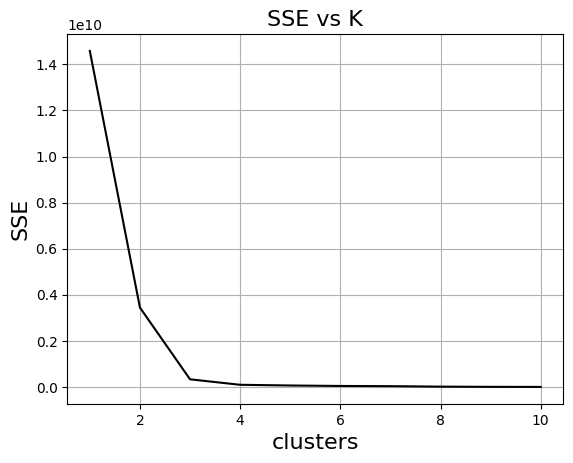

In [29]:
from sklearn.cluster import KMeans

sse_vals = []
num_clusters = np.arange(1, 11)

for k in num_clusters:
  model = KMeans(n_clusters=k, n_init='auto')
  model.fit(Xtrain)
  sse = model.inertia_
  sse_vals.append(sse)

fig, ax = plt.subplots()
ax.plot(num_clusters, sse_vals, '-k')
ax.set_xlabel('clusters', fontsize=16)
ax.set_ylabel('SSE', fontsize=16)
ax.set_title('SSE vs K', fontsize=16)
ax.grid()

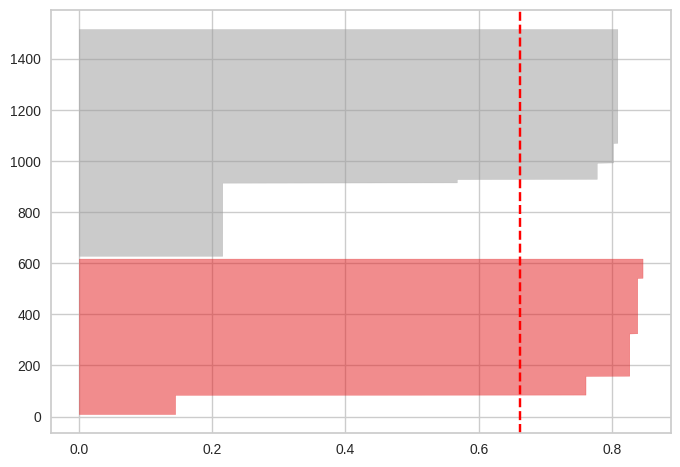

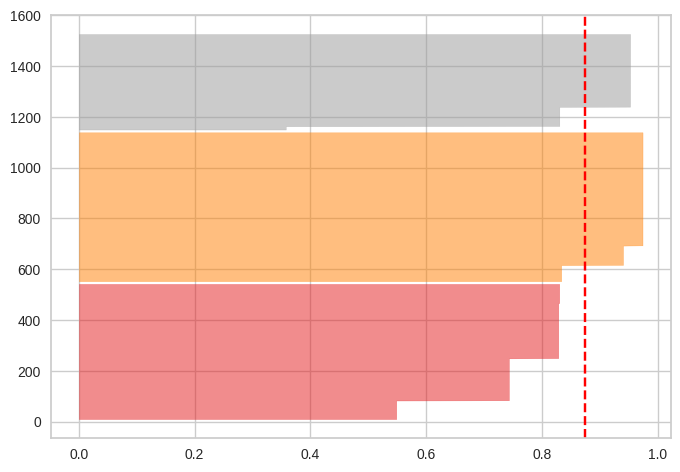

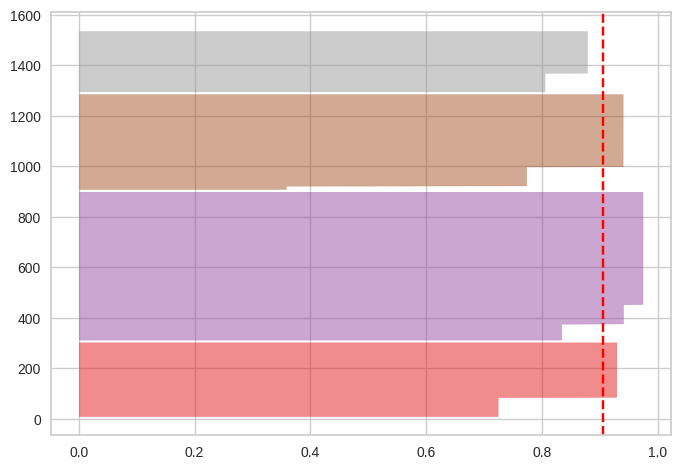

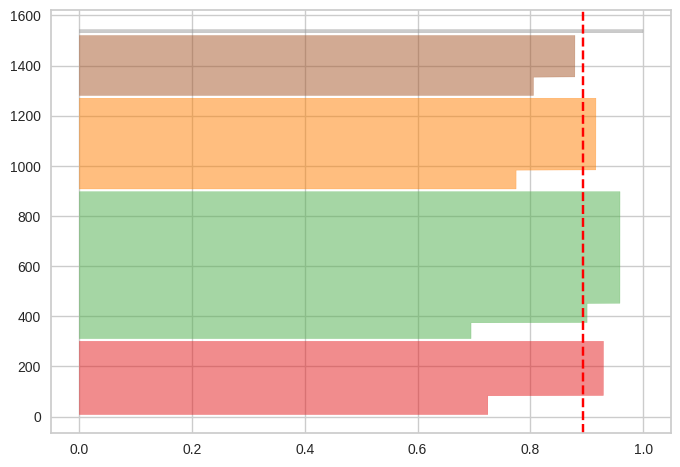

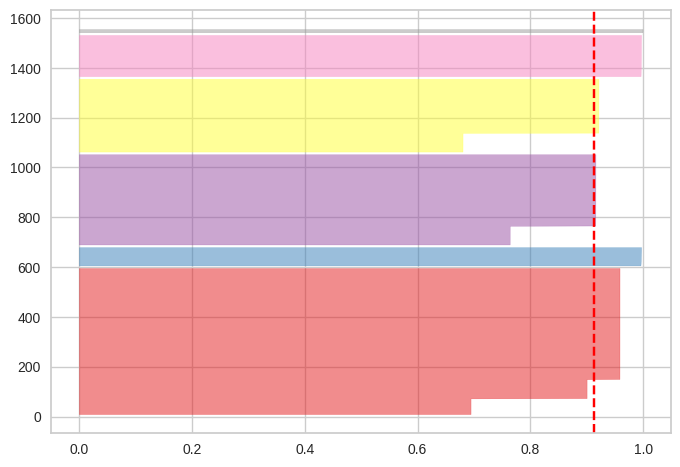

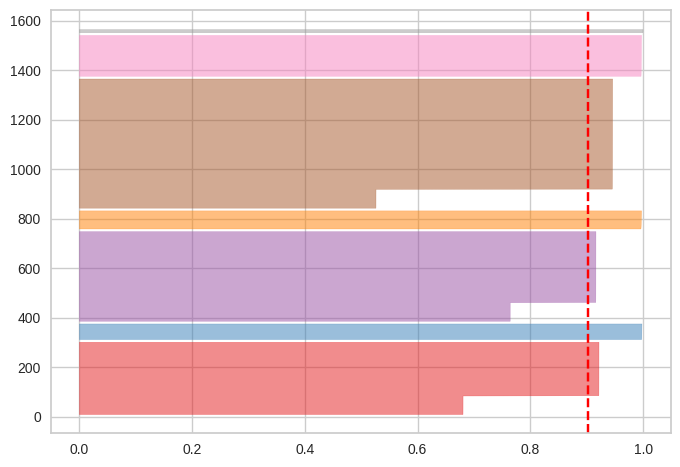

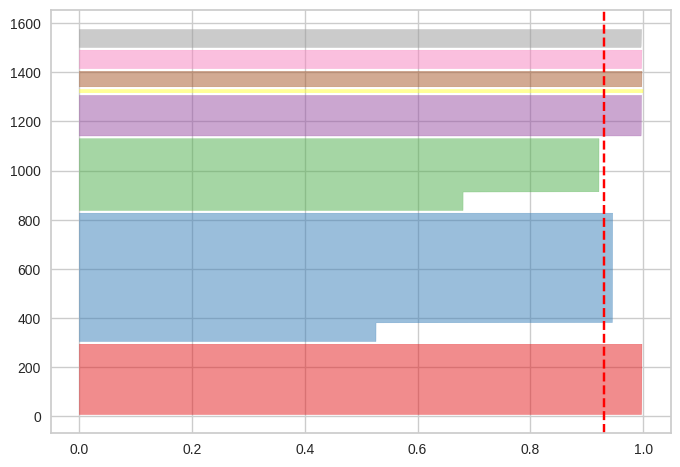

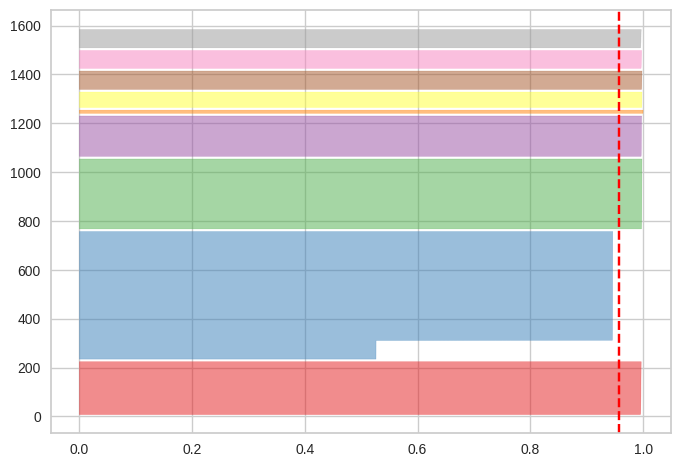

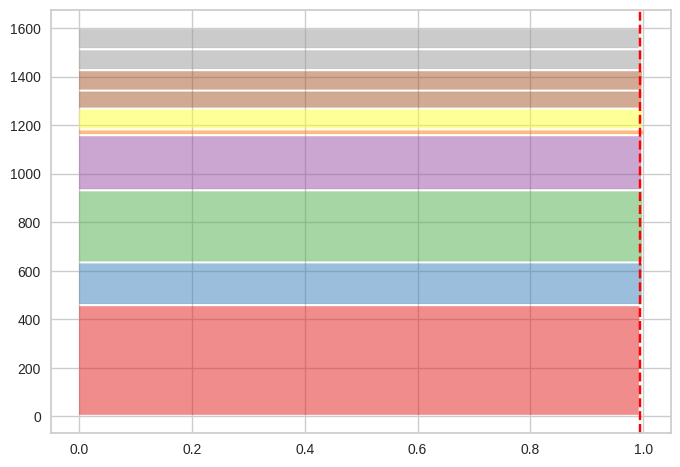

In [30]:
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

for k in range(2,11):
  fig, ax = plt.subplots()

  model = KMeans(n_clusters=k, n_init='auto')

  visualzier = SilhouetteVisualizer(model, ax=ax)
  visualzier.fit(Xtrain)

  plt.show()

In [31]:
model = KMeans(n_clusters=4, n_init='auto')
model.fit(Xtrain)
pred_label = model.predict(Xtest.drop('ID', axis=1))

Xtest['cluster_group'] = pred_label
Xtest['cluster_group'].value_counts()

1    192
3    120
2    115
0     73
Name: cluster_group, dtype: int64

In [32]:
Xtest.corr()

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
ID,1.000000,-0.084713,0.007285,-0.024982,0.016304,-0.023347,0.041976,-0.084637,0.016806,-0.031649,...,0.020128,0.005243,-0.083069,-0.036487,0.037993,0.004827,-0.004318,-0.037774,0.088750,-0.035132
Weight,-0.084713,1.000000,-0.054806,0.020394,-0.039995,-0.002480,0.012614,0.069039,-0.020695,0.024809,...,0.041329,0.011543,-0.035661,-0.009890,0.014847,-0.013120,-0.029890,0.012493,0.035868,-0.038175
ZipCode,0.007285,-0.054806,1.000000,0.006398,0.044924,0.001357,0.033600,0.079547,0.046489,0.030166,...,-0.010986,0.000108,-0.061890,0.014411,0.000403,0.023470,0.010951,-0.004003,0.025228,0.485310
SqFt,-0.024982,0.020394,0.006398,1.000000,-0.020509,-0.022302,0.094893,-0.012936,0.040676,-0.055688,...,-0.036139,-0.028626,-0.023192,0.160719,-0.000697,0.013212,0.059111,-0.033584,-0.060777,-0.066176
Water,0.016304,-0.039995,0.044924,-0.020509,1.000000,0.070298,-0.037775,0.029837,0.017115,-0.034646,...,0.062139,0.060236,-0.033998,-0.026168,-0.016394,-0.024306,-0.025754,0.040982,-0.071556,-0.036369
Shoes,-0.023347,-0.002480,0.001357,-0.022302,0.070298,1.000000,0.075702,-0.007542,-0.007946,-0.022428,...,0.129515,-0.060487,-0.017795,0.045277,0.049648,-0.026802,-0.012127,-0.042898,-0.056421,0.021985
Commute,0.041976,0.012614,0.033600,0.094893,-0.037775,0.075702,1.000000,0.048822,-0.031597,0.017350,...,0.005985,-0.000276,0.014896,0.040132,0.001861,-0.041268,-0.052712,-0.054967,0.066466,0.001550
NumKids,-0.084637,0.069039,0.079547,-0.012936,0.029837,-0.007542,0.048822,1.000000,0.026316,0.028789,...,-0.005992,-0.031382,0.063274,-0.020977,0.027535,-0.037361,-0.036497,0.045168,-0.003645,0.036770
Exercise,0.016806,-0.020695,0.046489,0.040676,0.017115,-0.007946,-0.031597,0.026316,1.000000,0.028415,...,-0.035339,0.112855,0.035211,0.012044,0.023394,-0.010456,0.021013,-0.026195,0.005187,0.013099
Age,-0.031649,0.024809,0.030166,-0.055688,-0.034646,-0.022428,0.017350,0.028789,0.028415,1.000000,...,-0.036298,-0.032486,0.030865,-0.011406,-0.058869,-0.039477,0.040566,0.079888,-0.026478,0.012348


In [33]:
Xtest.head(5)

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
0,101501,0.088231,221,0.294729,0.548416,0.000000,0.078791,0.333333,0.000000,0.405063,...,0,0,1,0,0,0,0,0,0,1
1,101502,0.099239,221,0.289351,0.224042,0.411765,0.175720,0.500000,1.000000,0.759494,...,0,0,0,0,0,0,1,0,0,1
2,101503,0.204844,221,0.173539,0.507770,0.411765,0.181382,0.166667,0.000000,0.025316,...,1,0,0,0,0,0,0,0,0,1
3,101504,0.038591,221,0.337397,0.333613,0.176471,0.316123,0.500000,0.000000,0.658228,...,0,0,1,0,0,0,0,0,0,1
4,101505,0.038871,221,0.354787,0.547109,0.235294,0.343282,0.333333,0.333333,0.911392,...,0,0,1,0,0,0,0,0,0,1


In [34]:
Xtest[Xtest['cluster_group'] == 0].describe()

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,73.0
mean,101766.369863,0.201541,6719.958904,0.348438,0.427206,0.340854,0.264698,0.381279,0.488584,0.475117,...,0.164384,0.068493,0.082192,0.027397,0.0,0.068493,0.109589,0.109589,0.164384,0.0
std,137.603346,0.188416,216.229330,0.035268,0.198235,0.192606,0.188164,0.206901,0.416045,0.287192,...,0.373188,0.254338,0.276557,0.164368,0.0,0.254338,0.314539,0.314539,0.373188,0.0
min,101509.000000,0.002362,6393.000000,0.281284,0.009800,0.000000,0.000000,0.000000,0.000000,0.012658,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,101655.000000,0.092234,6393.000000,0.329150,0.272715,0.176471,0.112764,0.333333,0.000000,0.202532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,101760.000000,0.164091,6861.000000,0.339010,0.430025,0.294118,0.213052,0.333333,0.333333,0.493671,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,101896.000000,0.236349,6861.000000,0.362316,0.549442,0.470588,0.404798,0.500000,1.000000,0.708861,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
max,101986.000000,0.981505,6861.000000,0.453388,1.000000,0.882353,0.726967,1.000000,1.000000,0.974684,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [35]:
Xtest[Xtest['cluster_group'] == 1].describe()

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000,192.0
mean,101745.119792,0.219860,312.791667,0.334007,0.393273,0.349571,0.245650,0.342014,0.421875,0.469673,...,0.135417,0.020833,0.171875,0.031250,0.0,0.057292,0.067708,0.104167,0.197917,1.0
std,146.548140,0.202217,203.525262,0.093583,0.183019,0.220195,0.175317,0.220225,0.388500,0.293688,...,0.343063,0.143200,0.378258,0.174448,0.0,0.233007,0.251902,0.306275,0.399471,0.0
min,101501.000000,0.000000,221.000000,0.000000,0.000000,0.000000,0.002687,0.000000,0.000000,0.025316,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,101620.500000,0.101992,221.000000,0.282270,0.265213,0.176471,0.101272,0.166667,0.000000,0.199367,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
50%,101750.000000,0.173539,221.000000,0.324131,0.370059,0.352941,0.223800,0.333333,0.333333,0.462025,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
75%,101859.250000,0.276031,221.000000,0.373521,0.525701,0.529412,0.342131,0.500000,0.666667,0.686709,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
max,101999.000000,0.999239,849.000000,0.609358,0.957021,0.882353,0.949616,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.0


In [36]:
Xtest[Xtest['cluster_group'] == 2].describe()

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,101760.486957,0.198173,3967.034783,0.302976,0.365498,0.366752,0.244845,0.371014,0.510145,0.436324,...,0.191304,0.017391,0.104348,0.060870,0.008696,0.069565,0.113043,0.078261,0.191304,2.0
std,142.493112,0.160566,429.548333,0.107792,0.170923,0.217647,0.176339,0.227347,0.390735,0.305534,...,0.395049,0.131296,0.307049,0.240137,0.093250,0.255526,0.318032,0.269757,0.395049,0.0
min,101506.000000,0.012290,2585.000000,0.165471,0.000000,0.000000,0.008445,0.000000,0.000000,0.012658,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,101636.000000,0.099480,3977.000000,0.256902,0.243875,0.176471,0.107054,0.166667,0.166667,0.151899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,101762.000000,0.181025,3977.000000,0.290427,0.373279,0.352941,0.204990,0.333333,0.333333,0.379747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,101880.500000,0.250761,3977.000000,0.317946,0.498367,0.529412,0.326392,0.500000,1.000000,0.677215,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
max,102000.000000,0.999199,4532.000000,1.000000,0.776004,0.823529,1.000000,1.000000,1.000000,0.987342,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [37]:
Xtest[Xtest['cluster_group'] == 3].describe()

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.0,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.0
mean,101739.883333,0.194641,8059.991667,0.333055,0.404600,0.352451,0.259323,0.383333,0.455556,0.493776,...,0.100000,0.0,0.141667,0.041667,0.0,0.075000,0.058333,0.100000,0.250000,3.0
std,147.463608,0.119066,171.865420,0.125992,0.173415,0.207797,0.188890,0.223084,0.398253,0.308401,...,0.301258,0.0,0.350170,0.200664,0.0,0.264496,0.235355,0.301258,0.434828,0.0
min,101508.000000,0.000320,7770.000000,0.000000,0.000000,0.000000,0.001248,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.0
25%,101608.000000,0.113301,7770.000000,0.257485,0.274161,0.220588,0.117442,0.166667,0.000000,0.237342,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.0
50%,101724.000000,0.184107,8161.000000,0.324937,0.431751,0.352941,0.212188,0.333333,0.333333,0.462025,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.0
75%,101861.500000,0.263451,8161.000000,0.406821,0.536061,0.470588,0.428287,0.500000,0.750000,0.772152,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,3.0
max,101998.000000,1.000000,8161.000000,0.799211,0.811937,1.000000,0.821881,0.833333,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,3.0


In [38]:
tmp = pd.DataFrame(columns = Xtest[Xtest['cluster_group'] == 3].columns)
tmp = tmp.append(Xtest[Xtest['cluster_group'] == 3].mean(), ignore_index=True)
tmp = tmp.append(Xtest[Xtest['cluster_group'] == 2].mean(), ignore_index=True)
tmp = tmp.append(Xtest[Xtest['cluster_group'] == 1].mean(), ignore_index=True)
tmp = tmp.append(Xtest[Xtest['cluster_group'] == 0].mean(), ignore_index=True)

tmp

<ipython-input-38-6aec8d22bcd9>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(Xtest[Xtest['cluster_group'] == 3].mean(), ignore_index=True)
<ipython-input-38-6aec8d22bcd9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(Xtest[Xtest['cluster_group'] == 2].mean(), ignore_index=True)
<ipython-input-38-6aec8d22bcd9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(Xtest[Xtest['cluster_group'] == 1].mean(), ignore_index=True)
<ipython-input-38-6aec8d22bcd9>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(Xtest[Xtest['cluster_group'] == 0].mean(), ignore_index=True)


,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
0,101739.883333,0.194641,8059.991667,0.333055,0.404600,0.352451,0.259323,0.383333,0.455556,0.493776,...,0.100000,0.000000,0.141667,0.041667,0.000000,0.075000,0.058333,0.100000,0.250000,3.0
1,101760.486957,0.198173,3967.034783,0.302976,0.365498,0.366752,0.244845,0.371014,0.510145,0.436324,...,0.191304,0.017391,0.104348,0.060870,0.008696,0.069565,0.113043,0.078261,0.191304,2.0
2,101745.119792,0.219860,312.791667,0.334007,0.393273,0.349571,0.245650,0.342014,0.421875,0.469673,...,0.135417,0.020833,0.171875,0.031250,0.000000,0.057292,0.067708,0.104167,0.197917,1.0
3,101766.369863,0.201541,6719.958904,0.348438,0.427206,0.340854,0.264698,0.381279,0.488584,0.475117,...,0.164384,0.068493,0.082192,0.027397,0.000000,0.068493,0.109589,0.109589,0.164384,0.0


The 4 different groups shows a ver similar mean of most of the columns. However, the job seem to be more interesting, and more worth to differeiate each of the groups

### Random Forest

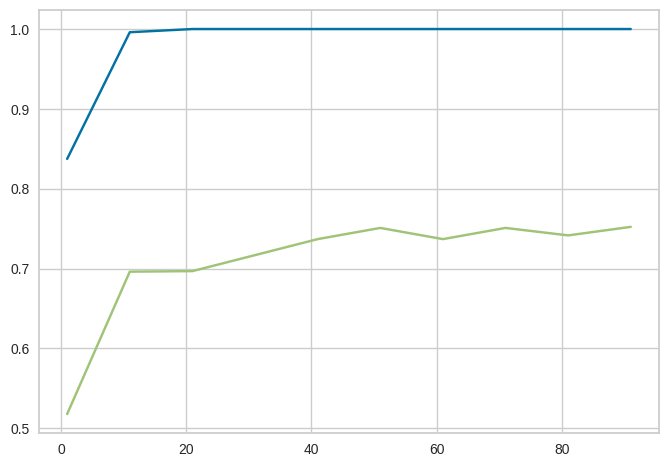

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

tree = np.arange(1, 100, 10)

tree_scores, vaild_scores = validation_curve(
    RandomForestClassifier(), Xtrain, ytrain,
    param_name="n_estimators", param_range=tree, cv=3
)

fig, ax = plt.subplots()
ax.plot(tree, tree_scores.mean(axis=1), label='Training')
ax.plot(tree, vaild_scores.mean(axis=1),label='validation')


In [40]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1499
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight                 1497 non-null   float64
 1   ZipCode                1497 non-null   int64  
 2   SqFt                   1497 non-null   float64
 3   Water                  1497 non-null   float64
 4   Shoes                  1497 non-null   float64
 5   Commute                1497 non-null   float64
 6   NumKids                1497 non-null   float64
 7   Exercise               1497 non-null   float64
 8   Age                    1497 non-null   float64
 9   Total_pets             1497 non-null   float64
 10  Pronoun_he             1497 non-null   uint8  
 11  Pronoun_she            1497 non-null   uint8  
 12  Pronoun_they           1497 non-null   uint8  
 13  Job_assistant manager  1497 non-null   uint8  
 14  Job_engineer           1497 non-null   uint8  
 15  Job_

In [41]:
from sklearn.model_selection import GridSearchCV

param_gird = {
    'n_estimators' : np.arange(1, 141, 10),
    'max_depth' : np.arange(1, 101, 10)
              }

gird = GridSearchCV(RandomForestClassifier(min_samples_leaf=2), param_gird, cv=5, verbose=1)
gird.fit(Xtrain, ytrain)

print(gird.best_params_)
print(gird.best_score_)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
{'max_depth': 91, 'n_estimators': 111}
0.7662207357859532


# XGBClassifier

In [ ]:
ytrain_1 = ytrain.map({'Cider':0, 'Cocoa':1, 'Coffee':2, 'Tea':3})

from xgboost import XGBClassifier


param_gird = {
    'n_estimators' : np.arange(0, 100, 10),
    'max_depth': np.arange(0, 100, 10),
    'learning_rate': np.arange(0.01, 0.05, 0.1)
              }

gird = GridSearchCV(XGBClassifier(), param_gird, cv=5, verbose=1)
gird.fit(Xtrain, ytrain_1)

print(gird.best_params_)
print(gird.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    re

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 70}
0.7454938684503902


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

ytrain = train['Beverage']

param_gird = {
    'n_neighbors' : np.arange(1,100, 2),
    'p' : np.arange(1,2),
    'leaf_size' : np.arange(1, 100, 10)
}

gird = GridSearchCV(KNeighborsClassifier(), param_gird, cv=3, verbose=1)
gird.fit(Xtrain, ytrain)

print(gird.best_params_)
print(gird.best_score_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'leaf_size': 1, 'n_neighbors': 75, 'p': 1}
0.44355377421509684


In [ ]:
Xtest

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
0,101501,0.088231,221,0.294729,0.548416,0.000000,0.078791,0.333333,0.000000,0.405063,...,0,0,1,0,0,0,0,0,0,1
1,101502,0.099239,221,0.289351,0.224042,0.411765,0.175720,0.500000,1.000000,0.759494,...,0,0,0,0,0,0,1,0,0,1
2,101503,0.204844,221,0.173539,0.507770,0.411765,0.181382,0.166667,0.000000,0.025316,...,1,0,0,0,0,0,0,0,0,1
3,101504,0.038591,221,0.337397,0.333613,0.176471,0.316123,0.500000,0.000000,0.658228,...,0,0,1,0,0,0,0,0,0,1
4,101505,0.038871,221,0.354787,0.547109,0.235294,0.343282,0.333333,0.333333,0.911392,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,101996,0.239912,4532,0.252599,0.700219,0.529412,0.236852,0.500000,0.666667,0.126582,...,0,0,0,0,0,0,0,0,1,2
496,101997,0.039712,8161,0.193439,0.219982,0.588235,0.430134,0.333333,0.666667,0.556962,...,0,0,1,0,0,0,0,0,0,3
497,101998,0.000320,8161,0.201864,0.674647,0.235294,0.530710,0.166667,1.000000,0.202532,...,0,0,0,0,0,1,0,0,0,3
498,101999,0.275781,221,0.368591,0.251902,0.470588,0.157294,0.000000,0.666667,0.354430,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
Xtest.head()

,ID,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Age,...,Job_physician,Job_receptionist,Job_sales associate,Job_scientist,Job_server,Job_software engineer,Job_teacher,Job_trucker,Job_vice president,cluster_group
0,101501,0.088231,221,0.294729,0.548416,0.000000,0.078791,0.333333,0.000000,0.405063,...,0,0,1,0,0,0,0,0,0,1
1,101502,0.099239,221,0.289351,0.224042,0.411765,0.175720,0.500000,1.000000,0.759494,...,0,0,0,0,0,0,1,0,0,1
2,101503,0.204844,221,0.173539,0.507770,0.411765,0.181382,0.166667,0.000000,0.025316,...,1,0,0,0,0,0,0,0,0,1
3,101504,0.038591,221,0.337397,0.333613,0.176471,0.316123,0.500000,0.000000,0.658228,...,0,0,1,0,0,0,0,0,0,1
4,101505,0.038871,221,0.354787,0.547109,0.235294,0.343282,0.333333,0.333333,0.911392,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
model = RandomForestClassifier(max_depth=59, n_estimators=139, min_samples_leaf=2)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest.drop(['cluster_group', 'ID'], axis=1))

Based on the experiment, the Randomforest classifier works the best. I just use GridSearchCV to run experienment with different hyper parameters

In [ ]:
output = pd.DataFrame({'ID': Xtest['ID'], 'Beverage': ypred})
output.to_csv('submission.csv', index=False)
print("Kaggle submission was successfully saved...")

Kaggle submission was successfully saved...
